# First Name: 
# Last Name: 

In [1]:
# import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
nesarc = pd.read_csv('nesarc.csv', low_memory=False)
pd.set_option('display.float_format', lambda x:'%f'%x)

In [3]:
nesarc['S3AQ3B1'] = pd.to_numeric(nesarc['S3AQ3B1'], errors='coerce') #convert variable to numeric
nesarc['S3AQ3C1'] = pd.to_numeric(nesarc['S3AQ3C1'], errors='coerce') #convert variable to numeric
nesarc['CHECK321'] = pd.to_numeric(nesarc['CHECK321'], errors='coerce') #convert variable to numeric
nesarc['TAB12MDX'] = pd.to_numeric(nesarc['TAB12MDX'], errors='coerce') #convert variable to numeric
nesarc['AGE'] = pd.to_numeric(nesarc['AGE'], errors='coerce') #convert variable to numeric

In [4]:
sub1=nesarc[(nesarc['AGE']>=18) & (nesarc['AGE']<=25) & (nesarc['CHECK321']==1)]
sub2=sub1.copy()

In [5]:
#SETTING MISSING DATA
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, np.nan)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, np.nan)

In [6]:
recode2 = {1: 30, 2: 22, 3: 14, 4: 5, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode2)

# Visualising a categorical variable - bar chart

In [7]:
# univariate bar graph for categorical variables
# First change format from numeric to categorical
sub2["TAB12MDX"] = sub2["TAB12MDX"].astype('category')
print(sub2)

       S3BQ1A1  ETHRACE2A ETOTLCA2  IDNUM    PSU  STRATUM       WEIGHT  CDAY  \
20          20          2   0.0099     21  36094     3616  1528.354757     2   
76          76          5   0.2643     77  36094     3616  6172.249980    13   
102        102          1    0.985    103  41097     4107  5515.974591    27   
121        121          1   0.8888    122  31098     3109  4152.434010    23   
135        135          1    0.017    136  12042     1218  8657.814391    11   
...        ...        ...      ...    ...    ...      ...          ...   ...   
42940    42940          2           42941  42099     4205  1564.139226     7   
42989    42989          5   0.0999  42990   6046      605  3486.254607     9   
42997    42997          1   0.6602  42998  53099     5304 12918.162000    14   
43087    43087          1   0.2641  43088  42037     4209  9663.995112    23   
43090    43090          1   0.3785  43091  18094     1802  8079.917091    16   

       CMON  CYEAR  ...  HAL12ABDEP  HA

Text(0.5, 1.0, 'Nicotine Dependence in the Past 12 Months Among\n Young Adult Smokers in the NESARC Study')

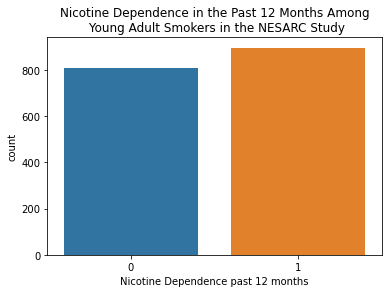

In [8]:
%matplotlib inline
sns.countplot(x="TAB12MDX", data=sub2)
plt.xlabel('Nicotine Dependence past 12 months')
plt.title('Nicotine Dependence in the Past 12 Months Among' + '\n' + ' Young Adult Smokers in the NESARC Study')

# Visualizing a quantitative variable - histogram

In [9]:
# A secondary variable multiplying the number of days smoked/month and the approx number of cig smoked/day
sub2['NUMCIGMO_EST']=sub2['USFREQMO'] * sub2['S3AQ3C1']

Text(0.5, 1.0, 'Estimated Number of Cigarettes per Month\namong Young Adult Smokers in the NESARC Study')

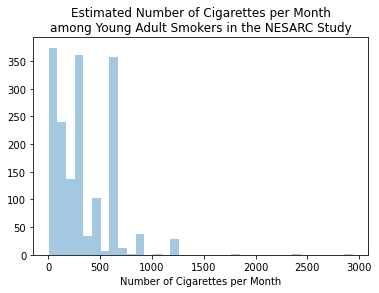

In [10]:
%matplotlib inline

#Univariate histogram for quantitative variable:
sns.distplot(sub2["NUMCIGMO_EST"].dropna(), kde=False);
plt.xlabel('Number of Cigarettes per Month')
plt.title('Estimated Number of Cigarettes per Month' + '\n' + 'among Young Adult Smokers in the NESARC Study')

# Spread and centre - quantitative variable

In [11]:
# standard deviation and other descriptive statistics for quantitative variables
print('describe number of cigarettes smoked per month')
desc1 = sub2['NUMCIGMO_EST'].describe()
print (desc1)

describe number of cigarettes smoked per month
count   1697.000000
mean     320.304361
std      274.436777
min        1.000000
25%       90.000000
50%      300.000000
75%      600.000000
max     2940.000000
Name: NUMCIGMO_EST, dtype: float64


# Alternative method

In [12]:
print('mean')
mean1 = sub2['NUMCIGMO_EST'].mean()
print (mean1)

print('std')
std1 = sub2['NUMCIGMO_EST'].std()
print (std1)

print('min')
min1 = sub2['NUMCIGMO_EST'].min()
print (min1)

print ('max')
max1 = sub2['NUMCIGMO_EST'].max()
print (max1)

print ('median')
median1 = sub2['NUMCIGMO_EST'].median()
print (median1)

print ('mode')
mode1 = sub2['NUMCIGMO_EST'].mode()
print (mode1)


mean
320.3043606364172
std
274.4367774906731
min
1.0
max
2940.0
median
300.0
mode
0   600.000000
dtype: float64


# Categorical variable describe()

In [13]:
print ('describe nicotine dependence')
desc2 = sub2['TAB12MDX'].describe()
print (desc2)

describe nicotine dependence
count     1706
unique       2
top          1
freq       896
Name: TAB12MDX, dtype: int64


# What if categorical data is treated like quantitative data

In [14]:
sub2['TAB12MDX'] = pd.to_numeric(sub2['TAB12MDX']) # convert a numerical variable to quantitatie

In [15]:
print ('describe nicotine dependence')
desc3 = sub2['TAB12MDX'].describe()
print (desc3) #descriptor don't have sense

describe nicotine dependence
count   1706.000000
mean       0.525205
std        0.499511
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: TAB12MDX, dtype: float64


# Visualising relationship between 2 variable
# Quantitative -> Categorical - Bar chart

In [16]:
# A secondary variable 
# number of cigarette smoked per month 
# assume that there is 20 cigarette in a pack
sub2['PACKSPERMONTH']=sub2['NUMCIGMO_EST'] / 20

In [17]:
c2= sub2.groupby('PACKSPERMONTH').size()
print (c2)

PACKSPERMONTH
0.050000      29
0.100000      14
0.125000      11
0.150000      12
0.200000       2
              ..
52.500000      1
60.000000     29
90.000000      2
120.000000     1
147.000000     1
Length: 66, dtype: int64


In [18]:
sub2['PACKCATEGORY'] = pd.cut(sub2.PACKSPERMONTH, [0, 5, 10, 20, 30, 147])

In [19]:
# change format from numeric to categorical
sub2['PACKCATEGORY'] = sub2['PACKCATEGORY'].astype('category')

In [20]:
print('describe PACKCATEGORY')
desc3 = sub2['PACKCATEGORY'].describe()
print (desc3)

print('pack category counts')
c7 = sub2['PACKCATEGORY'].value_counts(sort=False, dropna=True)
print(c7)

describe PACKCATEGORY
count         1697
unique           5
top       (10, 20]
freq           480
Name: PACKCATEGORY, dtype: object
pack category counts
(0, 5]       431
(5, 10]      232
(10, 20]     480
(20, 30]     467
(30, 147]     87
Name: PACKCATEGORY, dtype: int64


Text(6.799999999999997, 0.5, 'Proportion Nicotine Dependent')

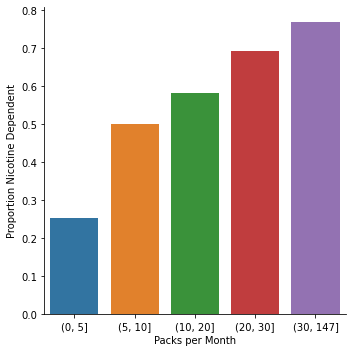

In [21]:
# bivariate bar graph Q->C
sns.catplot(x="PACKCATEGORY", y="TAB12MDX", data=sub2, kind="bar", ci=None)
plt.xlabel('Packs per Month')
plt.ylabel('Proportion Nicotine Dependent')

# Visualising 2 variable
# Categorical -> Categorical - Bar chart

In [22]:
# you can rename categorical variable values for graphing if original values are not informative 
# first change the variable format to categorical if you haven’t already done so
sub2['ETHRACE2A'] = sub2['ETHRACE2A'].astype('category')

sub2['ETHRACE2A']=sub2['ETHRACE2A'].cat.rename_categories(["White", "Black", "NatAm", "Asian", "Hispanic"])

In [23]:
# second create a new variable (PACKADAY) that has the new variable value labels
def PACK_ADAY (row):
   if row['USFREQMO'] >= 30 :
      return 1
   elif row['USFREQMO'] < 30 :
      return 0
      
sub2['PACK_ADAY'] = sub2.apply (lambda row: PACK_ADAY (row),axis=1)
      
c4= sub2.groupby('PACK_ADAY').size()
print(c4)

PACK_ADAY
0.000000     383
1.000000    1320
dtype: int64


Text(6.799999999999997, 0.5, 'Proportion of smoke a pack day Smokers')

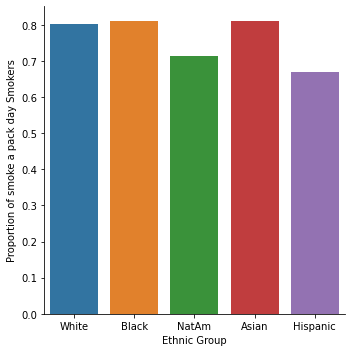

In [24]:
# bivariate bar graph C->C
sns.catplot(x='ETHRACE2A', y='PACK_ADAY', data=sub2, kind="bar", ci=None)
plt.xlabel('Ethnic Group')
plt.ylabel('Proportion of smoke a pack day Smokers')

# Visualising 2 variable
# Categorical -> Quantitative - box plot

In [25]:
sub2['AGE'] = sub2['AGE'].astype('category') 
sub2['S1Q10A'] = pd.to_numeric(sub2['S1Q10A'])

Text(0, 0.5, 'Income')

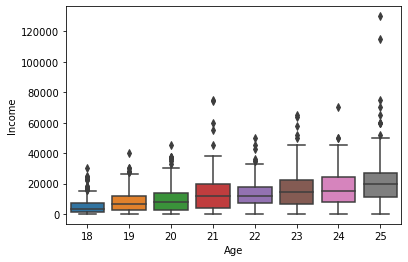

In [26]:
%matplotlib inline
sns.boxplot(x='AGE', y='S1Q10A', data=sub2)
plt.xlabel('Age')
plt.ylabel('Income')

# Visualising 2 variable
# Quantitative -> Quantitative - scatter plot

In [27]:
pd.set_option('display.float_format', lambda x:'%.2f'%x)

gapminder = pd.read_csv('gapminder.csv', low_memory=False)
gapminder.head()

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,,.03,.5696534,26.8,75944000,25.6000003814697,,3.65412162280064,48.673,,0,,6.68438529968262,55.7000007629394,24.04
1,Albania,1914.99655094922,7.29,1.0247361,57.4,223747333.333333,42.0999984741211,,44.9899469578783,76.918,,9,636.341383366604,7.69932985305786,51.4000015258789,46.72
2,Algeria,2231.99333515006,.69,2.306817,23.5,2932108666.66667,31.7000007629394,.1,12.5000733055148,73.131,.42009452521537,2,590.509814347428,4.8487696647644,50.5,65.22
3,Andorra,21943.3398976022,10.17,,,,,,81,,,,,5.36217880249023,,88.92
4,Angola,1381.00426770244,5.57,1.4613288,23.1,248358000,69.4000015258789,2,9.99995388324075,51.093,,-2,172.999227388199,14.5546770095825,75.6999969482422,56.7


In [28]:
gapminder['internetuserate'] = pd.to_numeric(gapminder['internetuserate'],errors='coerce')
gapminder['urbanrate'] = pd.to_numeric(gapminder['urbanrate'],errors='coerce')

In [29]:
gapminder_clean=gapminder.dropna()

Text(0.5, 1.0, 'Scatterplot for the Association Between Urban Rate\nand Internet Use Rate')

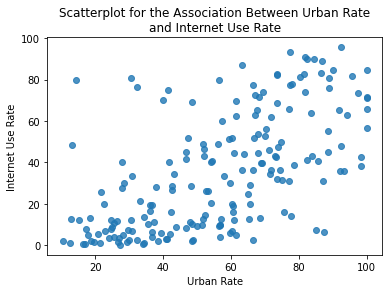

In [30]:
%matplotlib inline
plt.figure()

scat1 = sns.regplot(x="urbanrate", y="internetuserate", fit_reg=False, data=gapminder_clean)
plt.xlabel('Urban Rate')
plt.ylabel('Internet Use Rate')
plt.title('Scatterplot for the Association Between Urban Rate' + '\n' + 'and Internet Use Rate')